In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility


In [2]:
# Each letter is a 5x6 binary image (flattened into a 30-length vector)
def letter_to_image(letter):
    return np.array(letter).reshape((6, 5))

A = [0,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,1,
     1,0,0,0,1,
     1,0,0,0,1,
     1,0,0,0,1]

B = [1,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,0,
     1,0,0,0,1,
     1,0,0,0,1,
     1,1,1,1,0]

C = [0,1,1,1,1,
     1,0,0,0,0,
     1,0,0,0,0,
     1,0,0,0,0,
     1,0,0,0,0,
     0,1,1,1,1]

# Convert to numpy arrays
X = np.array([A, B, C])
y = np.array([0, 1, 2])  # Labels: 0=A, 1=B, 2=C


In [3]:
# One-hot encoding
def one_hot(y, num_classes=3):
    return np.eye(num_classes)[y]

y_encoded = one_hot(y)


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [5]:
# Input layer (30), Hidden layer (10), Output layer (3)
input_size = 30
hidden_size = 10
output_size = 3

# Weights
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [6]:
# Input layer (30), Hidden layer (10), Output layer (3)
input_size = 30
hidden_size = 10
output_size = 3

# Weights
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [7]:
def feedforward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

def backpropagation(X, y, z1, a1, z2, a2, lr=0.1):
    global W1, W2, b1, b2
    error = a2 - y
    d_z2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    W1 -= lr * d_W1
    b1 -= lr * d_b1
    W2 -= lr * d_W2
    b2 -= lr * d_b2

    return np.mean(np.square(error))


In [8]:
epochs = 5000
losses = []

for epoch in range(epochs):
    z1, a1, z2, a2 = feedforward(X)
    loss = backpropagation(X, y_encoded, z1, a1, z2, a2)
    losses.append(loss)

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")


Epoch 0 | Loss: 0.2631
Epoch 500 | Loss: 0.0057
Epoch 1000 | Loss: 0.0027
Epoch 1500 | Loss: 0.0018
Epoch 2000 | Loss: 0.0013
Epoch 2500 | Loss: 0.0010
Epoch 3000 | Loss: 0.0009
Epoch 3500 | Loss: 0.0007
Epoch 4000 | Loss: 0.0006
Epoch 4500 | Loss: 0.0006


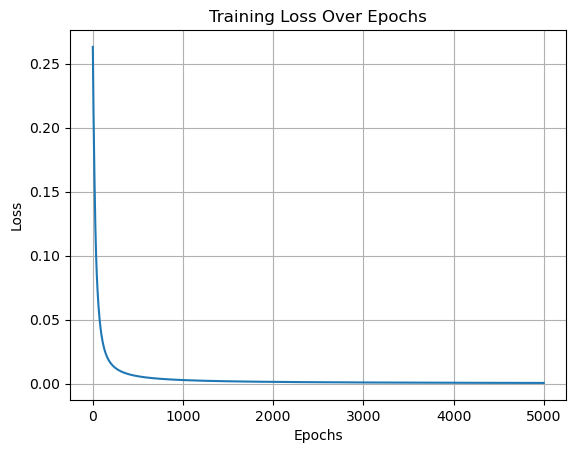

In [9]:
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [10]:
def predict(image):
    _, _, _, output = feedforward(image)
    return np.argmax(output, axis=1)

predictions = predict(X)
print("Predictions:", predictions)
print("Actual:", y)


Predictions: [0 1 2]
Actual: [0 1 2]


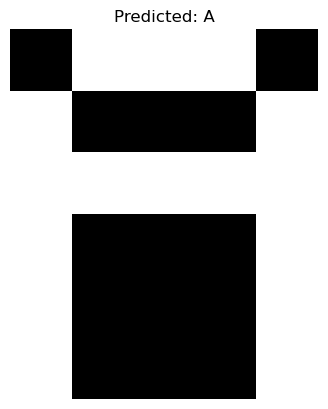

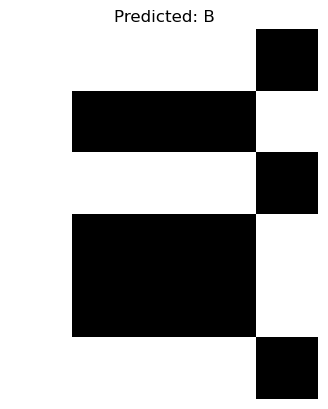

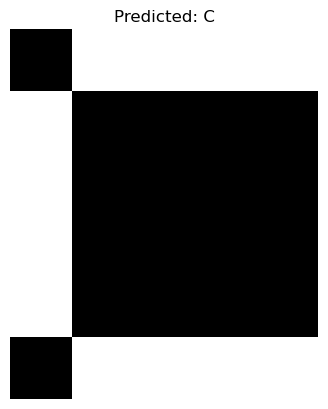

In [11]:
for i in range(3):
    plt.imshow(letter_to_image(X[i]), cmap="gray")
    plt.title(f"Predicted: {['A', 'B', 'C'][predictions[i]]}")
    plt.axis('off')
    plt.show()
